In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import utils as ut
from assets import Account, BankAccount, CollectiveCompound

# Example #1
Visualizing the performance of various assets in a portfolio

In [2]:
# Create a Brokerage Account
a = Account()
# Create a Savings Account
b = BankAccount(balance=20000, interest_rate=0.5, name='TD Savings Account')

# add a couple GICs to the brokerage account
g1 = a.Gic(balance=8000, interest_rate=3.2, maturity=5, name='Manulife GIC', is_reinvest=True)
g2 = a.Gic(balance=5000, interest_rate=1.65, maturity=1, name='CIBC GIC', is_reinvest=True)
# add a couple stocks/ETFs to the brokerage account
s1 = a.Stock(a, name='FTS.TO', shares=110, price=50.82, dividend=1.8, annual_growth=5, volatility='med', drip=True,
             dividend_percent_growth=7)
s2 = a.Stock(a, name='IVV', shares=38, price=285.02, dividend=5, annual_growth=7, volatility='high', drip=True)

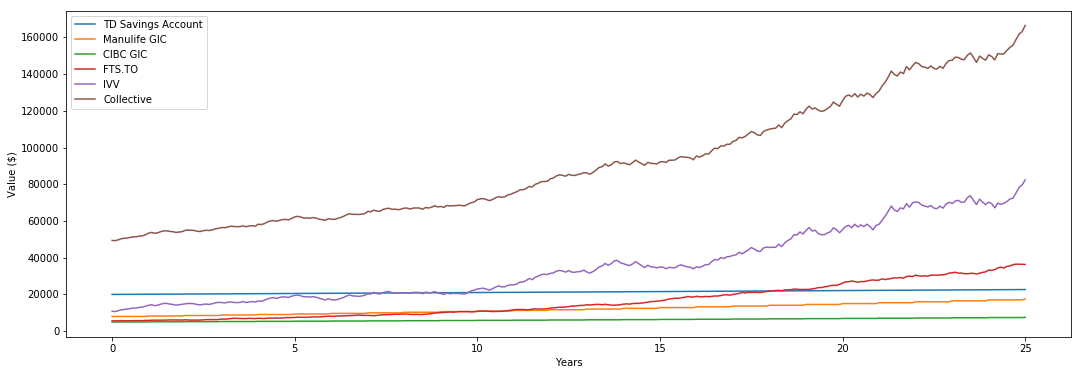

In [3]:
plt.figure(figsize=(18,6))
CollectiveCompound(years=25, months=0, args=[b, g1, g2, s1, s2])

# Example #2
Comparing various portfolios of $10,000

In [4]:
# Portfolio 1
ETFs = Account()
# Portfolio 2
PennyStocks = Account()
# Portfolio 3
BlueChips = Account()

# Make ETF portfolio
VTI = ETFs.Stock(a, name='VTI', shares=23, price=144.51, dividend=2.7, annual_growth=6, volatility='low', drip=True)
SPY = ETFs.Stock(a, name='SPY', shares=11, price=282.95, dividend=5, annual_growth=8, volatility='low', drip=True)
IEFA = ETFs.Stock(a, name='IEFA', shares=55, price=60.62, dividend=1.8, annual_growth=7, volatility='med', drip=True)

# Make Penny Stock portfolio
MAXR = PennyStocks.Stock(a, name='MAXR', shares=436, price=7.64, dividend=0.04, annual_growth=1, volatility='high', drip=True)
HCLP = PennyStocks.Stock(a, name='HCLP', shares=1388, price=2.4, dividend=0, annual_growth=2, volatility='high', drip=True)
CRNT = PennyStocks.Stock(a, name='CRNT', shares=1190, price=2.81, dividend=0, annual_growth=4, volatility='high', drip=True)

# Make Blue Chip Stock portfolio
JNJ = BlueChips.Stock(a, name='JNJ', shares=24, price=138.80, dividend=3.8, annual_growth=6, volatility='low', drip=True, dividend_percent_growth=7)
BRK = BlueChips.Stock(a, name='BRK', shares=16, price=201.78, dividend=0, annual_growth=7, volatility='med', drip=True)
BAC = BlueChips.Stock(a, name='IEFA', shares=119, price=28.19, dividend=0.6, annual_growth=5, volatility='med', drip=True, dividend_percent_growth=5)

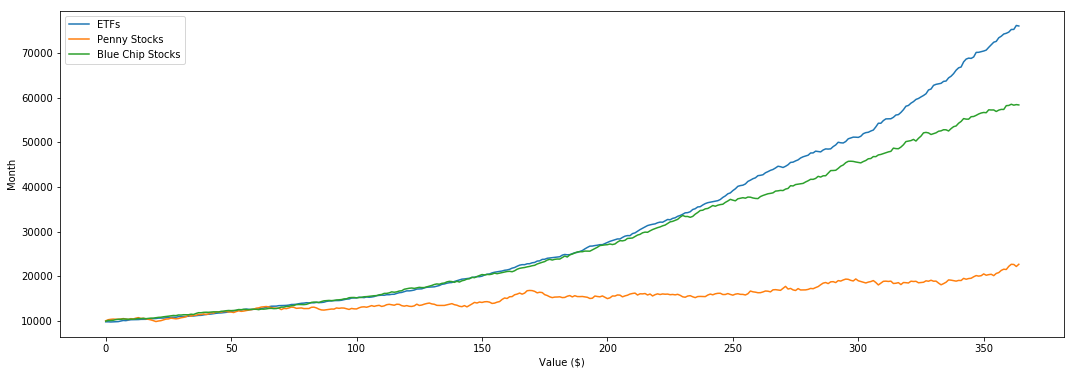

In [5]:
ETF_value = CollectiveCompound(years=30, months=4, plot=False, args=[VTI, SPY, IEFA])
Penny_value = CollectiveCompound(years=30, months=4, plot=False, args=[MAXR, HCLP, CRNT])
Blue_value = CollectiveCompound(years=30, months=4, plot=False, args=[JNJ, BRK, BAC])

plt.figure(figsize=(18,6));
plt.plot(ETF_value, label='ETFs')
plt.plot(Penny_value, label='Penny Stocks')
plt.plot(Blue_value, label='Blue Chip Stocks')
plt.xlabel('Value ($)')
plt.ylabel('Month')
plt.legend();


# Example #3
Basic Monte Carlo Simulation of portfolio

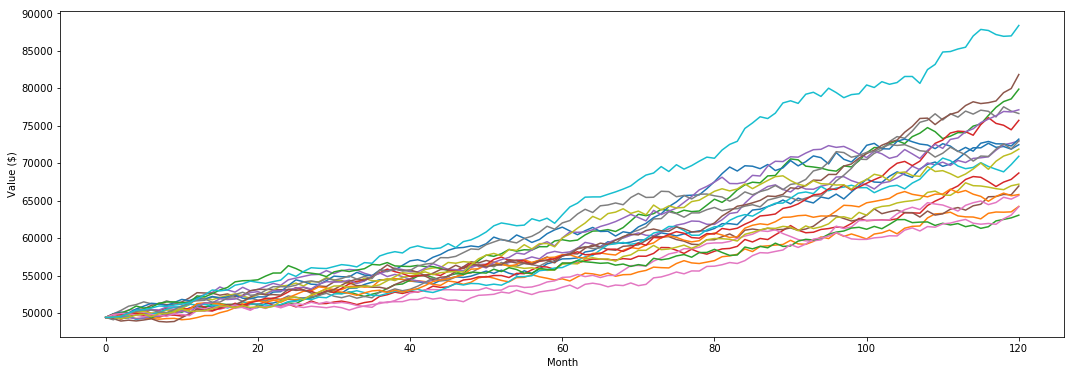

In [6]:
plt.figure(figsize=(18,6))
# make 20 simulations
for _ in range(20):
    # Use portfolio from Example #1
    a = Account()
    b = BankAccount(balance=20000, interest_rate=0.5, name='TD Savings Account')

    g1 = a.Gic(balance=8000, interest_rate=3.2, maturity=5, name='Manulife GIC', is_reinvest=True)
    g2 = a.Gic(balance=5000, interest_rate=1.65, maturity=1, name='CIBC GIC', is_reinvest=True)
    s1 = a.Stock(a, name='FTS.TO', shares=110, price=50.82, dividend=1.8, annual_growth=5, volatility='med', drip=True,
                 dividend_percent_growth=7)
    s2 = a.Stock(a, name='IVV', shares=38, price=285.02, dividend=5, annual_growth=7, volatility='high', drip=True)
    
    sample = CollectiveCompound(years=10, months=0, plot=False, args=[b, g1, g2, s1, s2])
    plt.plot(sample)
    
plt.ylabel('Value ($)');
plt.xlabel('Month');